# <b> CUSTOMER CHURN PREDICTION FOR AZUBIAN  PROJECT

## `Business Understanding`

## Introduction:

In today's highly competitive telecommunications industry, retaining customers is paramount for sustaining business growth and profitability. With an ever-increasing array of options available to consumers, telecom companies face the ongoing challenge of preventing customer churn - the phenomenon where subscribers discontinue their services, often opting for competitors' offerings. To address this challenge, an African telecommunications company specializing in providing airtime and mobile data bundles seeks to leverage machine learning to predict customer churn.

## Objective:

The objective of this project is to develop a robust machine learning model capable of accurately predicting the likelihood of customer churn within a 90-day period. By identifying customers who are at risk of becoming inactive, the telecom company aims to proactively intervene and implement targeted retention strategies. Ultimately, the goal is to reduce customer churn rates, thereby enhancing customer satisfaction, loyalty, and overall business performance.


### Variable Definitions


#### The table below provides a description of the variables present in the customer churn prediction dataset. These variables capture various aspects of customer behavior, usage patterns, and demographic information. Understanding these variables is crucial for developing a robust machine learning model to predict customer churn accurately.

| Column           | Description                                               |
|------------------|-----------------------------------------------------------|
| user_id          | Unique identifier for each client                         |
| REGION           | The location of each client                               |
| TENURE           | Duration in the network                                   |
| MONTANT          | Top-up amount                                             |
| FREQUENCE_RECH   | Number of times the customer refilled                     |
| REVENUE          | Monthly income of each client                             |
| ARPU_SEGMENT     | Income over 90 days / 3                                   |
| FREQUENCE        | Number of times the client has made an income             |
| DATA_VOLUME      | Number of connections                                     |
| ON_NET           | Inter expresso call                                       |
| ORANGE           | Call to orange                                            |
| TIGO             | Call to Tigo                                              |
| ZONE1            | Call to zones1                                            |
| ZONE2            | Call to zones2                                            |
| MRG              | A client who is going                                     |
| REGULARITY       | Number of times the client is active for 90 days          |
| TOP_PACK         | The most active packs                                     |
| FREQ_TOP_PACK    | Number of times the client has activated the top packs    |
| CHURN            | Variable to predict - Target                              |



## `Data Understanding`

### Importation of important Libraries


In [54]:
# Data Manipulations & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Data Preparation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

#Model Persistance
import joblib


### `Loading the Datasets`

#### <b> Train dataset

In [3]:
# Load the training data into a DataFrame
Train_df = data = pd.read_csv('Data/Train.csv')
Train_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


In [4]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

In [5]:
Train_df.shape

(1077024, 19)

In [6]:
#checking for null values
Train_df.isna().sum()

user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

### Summary of Train_df Dataset Characteristics as Observed.

#### Size of the Dataset:

- The dataset contains 1,077,024 entries (rows).
- There are 19 columns in the dataset.

#### Data Types:

- The dataset contains a mix of data types:
  - 5 columns are of type object.
  - 12 columns are of type float64.
  - 2 columns are of type int64.

#### Missing Values:

- Several columns have missing values:
  - REGION: 424,337 missing values.
  - MONTANT, FREQUENCE_RECH, REVENUE, ARPU_SEGMENT, FREQUENCE, DATA_VOLUME, ON_NET, ORANGE, TIGO, ZONE1, ZONE2, TOP_PACK, FREQ_TOP_PACK: Variable numbers of missing values ranging from 161,863 to 530,763.
  - MRG has no missing values.

#### Duplicates:

- There are no duplicated rows in the dataset (Train_df.duplicated().sum() = 0).

#### Target Variable:

- The target variable CHURN is binary, with values of 0 or 1.
- There are no missing values for the target variable.


In [7]:
# Iterate over each column in the DataFrame to get the unique values.
for column in Train_df.columns:
    # Print the column name
    print(f"Column: {column}")
    # Print the unique values in the column
    print(Train_df[column].unique())
    print()  # Add a newline for better readability


Column: user_id
['7ee9e11e342e27c70455960acc80d3f91c1286d1'
 '50443f42bdc92b10388fc56e520e4421a5fa655c'
 'da90b5c1a9b204c186079f89969aa01cb03c91b2' ...
 'd6831b8edacb7d9928b3f053fb1283574577ae42'
 'cb1f6510b084173c0deae49095f35ac29f916701'
 '28f56fd0d9f8d8647bb6c62e7a3f4f35f49f4d6f']

Column: REGION
['DAKAR' nan 'SAINT-LOUIS' 'THIES' 'LOUGA' 'MATAM' 'FATICK' 'KAOLACK'
 'DIOURBEL' 'TAMBACOUNDA' 'ZIGUINCHOR' 'KOLDA' 'KAFFRINE' 'SEDHIOU'
 'KEDOUGOU']

Column: TENURE
['K > 24 month' 'E 6-9 month' 'H 15-18 month' 'G 12-15 month'
 'I 18-21 month' 'J 21-24 month' 'F 9-12 month' 'D 3-6 month']

Column: MONTANT
[20000.    nan  7900. ... 35475.  6216.  8949.]

Column: FREQUENCE_RECH
[ 47.  nan  19.  21.   2.   1.  13.   3.   5.  14.   7.  20.  15.   4.
  16.  11.   8.  23.  18.  17.  12.  27.  50.  40.   9.   6.  32.  39.
  33.  38.  48.  60.  26.  49.  10.  44.  22.  30.  28.  46.  52.  25.
  45.  24.  36.  62.  37.  58.  29.  69.  51.  31.  64.  35.  56.  85.
  73.  53.  55.  34.  57.  43.  72

In [8]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

### Train_df cleaning 

In [9]:
# Rename specific columns
Train_df.rename(columns={'MONTANT': 'Top-up Amount', 'FREQUENCE_RECH': 'Top-up Frequency', 'FREQUENCE': 'Income Frequency'}, inplace=True)
Train_df.head(5)

,user_id,REGION,TENURE,Top-up Amount,Top-up Frequency,REVENUE,ARPU_SEGMENT,Income Frequency,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


 I translated the French column names to English.This translation process makes the column names more intuitive and understandable to users since i believe English is more of a global language, enhancing the clarity and usability of the DataFrame.

In [10]:
Train_df.isna().sum()/(len(data))*100

user_id              0.000000
REGION              39.399029
TENURE               0.000000
Top-up Amount       35.086033
Top-up Frequency    35.086033
REVENUE             33.644097
ARPU_SEGMENT        33.644097
Income Frequency    33.644097
DATA_VOLUME         49.187669
ON_NET              36.505593
ORANGE              41.516624
TIGO                59.866261
ZONE1               92.117353
ZONE2               93.612584
MRG                  0.000000
REGULARITY           0.000000
TOP_PACK            41.864898
FREQ_TOP_PACK       41.864898
CHURN                0.000000
dtype: float64

In [11]:
# Drop columns 'ZONE1' and 'ZONE2' due to high percentage of missing values
Train_df.drop(columns=['ZONE1', 'ZONE2'], inplace=True)


. I dropped columns  "ZONE1" and "ZONE2" since they have a very high percentage of missing values (more than 90%).

#### <b> Test Dataset

In [12]:
# Load the test data into a DataFrame
Test_df = pd.read_csv('Data/Test.csv')
Test_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0


In [13]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190063 entries, 0 to 190062
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         190063 non-null  object 
 1   REGION          115330 non-null  object 
 2   TENURE          190063 non-null  object 
 3   MONTANT         123695 non-null  float64
 4   FREQUENCE_RECH  123695 non-null  float64
 5   REVENUE         126422 non-null  float64
 6   ARPU_SEGMENT    126422 non-null  float64
 7   FREQUENCE       126422 non-null  float64
 8   DATA_VOLUME     96716 non-null   float64
 9   ON_NET          120771 non-null  float64
 10  ORANGE          111417 non-null  float64
 11  TIGO            76555 non-null   float64
 12  ZONE1           14850 non-null   float64
 13  ZONE2           12011 non-null   float64
 14  MRG             190063 non-null  object 
 15  REGULARITY      190063 non-null  int64  
 16  TOP_PACK        110773 non-null  object 
 17  FREQ_TOP_P

In [14]:
Test_df.shape

(190063, 18)

In [15]:
Test_df.isna().sum()

user_id                0
REGION             74733
TENURE                 0
MONTANT            66368
FREQUENCE_RECH     66368
REVENUE            63641
ARPU_SEGMENT       63641
FREQUENCE          63641
DATA_VOLUME        93347
ON_NET             69292
ORANGE             78646
TIGO              113508
ZONE1             175213
ZONE2             178052
MRG                    0
REGULARITY             0
TOP_PACK           79290
FREQ_TOP_PACK      79290
dtype: int64

In [16]:
Test_df.isna().sum()/(len(data))*100

user_id            0.000000
REGION             6.938843
TENURE             0.000000
MONTANT            6.162165
FREQUENCE_RECH     6.162165
REVENUE            5.908968
ARPU_SEGMENT       5.908968
FREQUENCE          5.908968
DATA_VOLUME        8.667123
ON_NET             6.433654
ORANGE             7.302159
TIGO              10.539041
ZONE1             16.268254
ZONE2             16.531851
MRG                0.000000
REGULARITY         0.000000
TOP_PACK           7.361953
FREQ_TOP_PACK      7.361953
dtype: float64

In [17]:
# Drop columns 'ZONE1' and 'ZONE2' since they are no longer in use
Test_df.drop(columns=['ZONE1', 'ZONE2'], inplace=True)

#### Summary Statistics 

In [18]:
Train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Top-up Amount,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
Top-up Frequency,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
Income Frequency,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
REGULARITY,1077024.0,28.044496,22.288610,1.0,6.0,24.0,51.0,62.0


From the statistics summary provided, we can infer several insights:

1. **Top-up Amount**:
   - The average top-up amount is approximately 5529.21 units, with a standard deviation of 7104.74, indicating a wide variability in the amount of top-ups.
   - The minimum top-up amount is 20 units, and the maximum is 470,000 units.

2. **Top-up Frequency**:
   - On average, users perform top-ups around 11.52 times, with a standard deviation of 13.26.
   - The minimum frequency observed is 1, while the maximum is 131.

3. **Revenue** and **ARPU_SEGMENT**:
   - Both revenue and average revenue per user segment follow similar patterns to top-up amount, with wide ranges and high standard deviations.
   - There seems to be a significant variability in revenue and ARPU_SEGMENT across users.

4. **Income Frequency**:
   - The average income frequency is approximately 13.97, with a standard deviation of 14.69.
   - Similar to top-up frequency, there is variability in how often users receive income.

5. **Data Volume**, **ON_NET**, **ORANGE**, and **TIGO**:
   - These features represent usage metrics such as data volume and usage on specific networks.
   - There is considerable variability in these metrics, as indicated by their standard deviations.

6. **Regularity**:
   - Users have regularity in their activities, with an average regularity of 28.04.
   - The standard deviation of 22.29 suggests variability in user behavior in terms of regularity.

7. **Frequency of Top Pack**:
   - Users' frequency of using the top pack varies widely, with an average of 9.26 and a standard deviation of 12.24.

8. **Churn**:
   - The churn rate is relatively low, with an average of 0.187 and a standard deviation of 0.390.
   - Most users seem to have not churned, as indicated by the quartile values and the mean being close to zero.

Overall, these statistics provide insights into the distribution and variability of different user behaviors and metrics, which can be valuable for understanding user patterns and making informed decisions in customer management and service offerings.


## Exploratory Data Analysis

### <b> Univariate Analysis

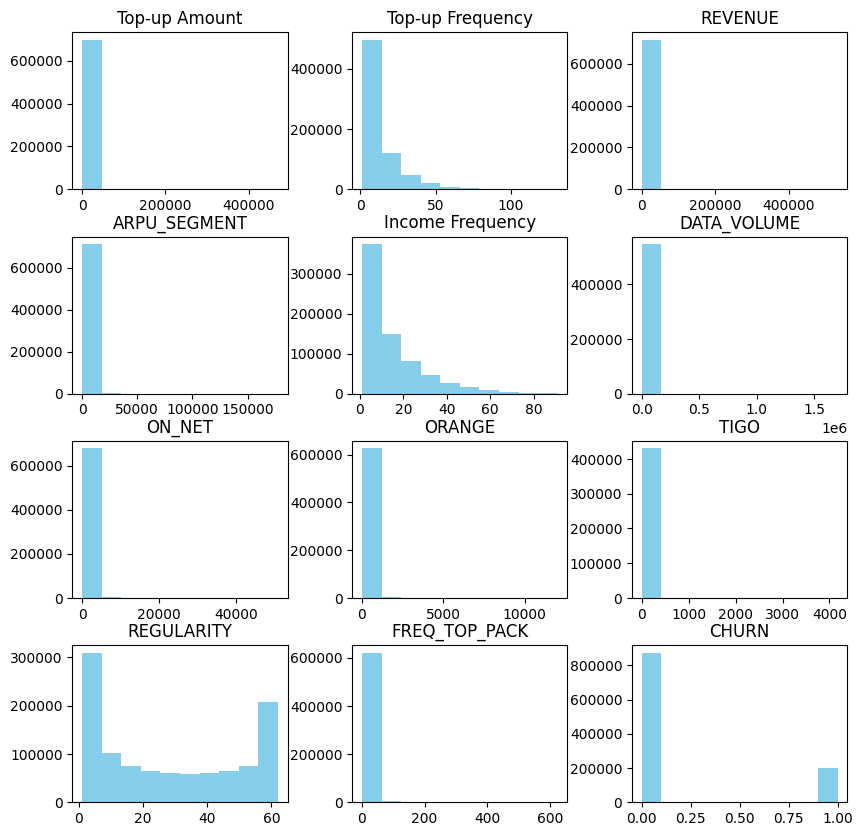

In [19]:
#setting color palette for the project
sns.color_palette("pastel")
Train_df.hist(figsize=(10, 10), grid=False, color='skyblue')
plt.show()

#### Checking for outliers

In [20]:

# Select numerical columns for outlier detection
numerical_cols = ['Top-up Amount', 'Top-up Frequency', 'REVENUE', 'ARPU_SEGMENT', 
                  'Income Frequency', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 
                  'REGULARITY', 'FREQ_TOP_PACK']

# Calculate the IQR for each numerical column
Q1 = Train_df[numerical_cols].quantile(0.25)
Q3 = Train_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a function to detect outliers using IQR
def detect_outliers_iqr(df):
    outliers = {}
    for col in numerical_cols:
        lower_bound = Q1[col] - 1.5 * IQR[col]
        upper_bound = Q3[col] + 1.5 * IQR[col]
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

# Call the function to detect outliers
outliers = detect_outliers_iqr(Train_df)

# Print outliers
for col, values in outliers.items():
    print(f"Outliers in column '{col}':")
    print(values)
    print()


Outliers in column 'Top-up Amount':
0          20000.0
18         71000.0
63         19500.0
81         19500.0
96         19200.0
            ...   
1076864    29800.0
1076871    22450.0
1076915    31000.0
1076917    24200.0
1077011    25500.0
Name: Top-up Amount, Length: 43778, dtype: float64

Outliers in column 'Top-up Frequency':
0          47.0
61         50.0
63         40.0
81         39.0
96         38.0
           ... 
1076864    97.0
1076871    39.0
1076901    40.0
1076917    46.0
1077011    44.0
Name: Top-up Frequency, Length: 40024, dtype: float64

Outliers in column 'REVENUE':
0          21602.0
18         72280.0
63         20001.0
81         20000.0
96         19198.0
            ...   
1076871    23949.0
1076907    17502.0
1076915    29050.0
1076917    25200.0
1077011    26489.0
Name: REVENUE, Length: 45587, dtype: float64

Outliers in column 'ARPU_SEGMENT':
0           7201.0
18         24093.0
63          6667.0
81          6667.0
96          6399.0
            ...   

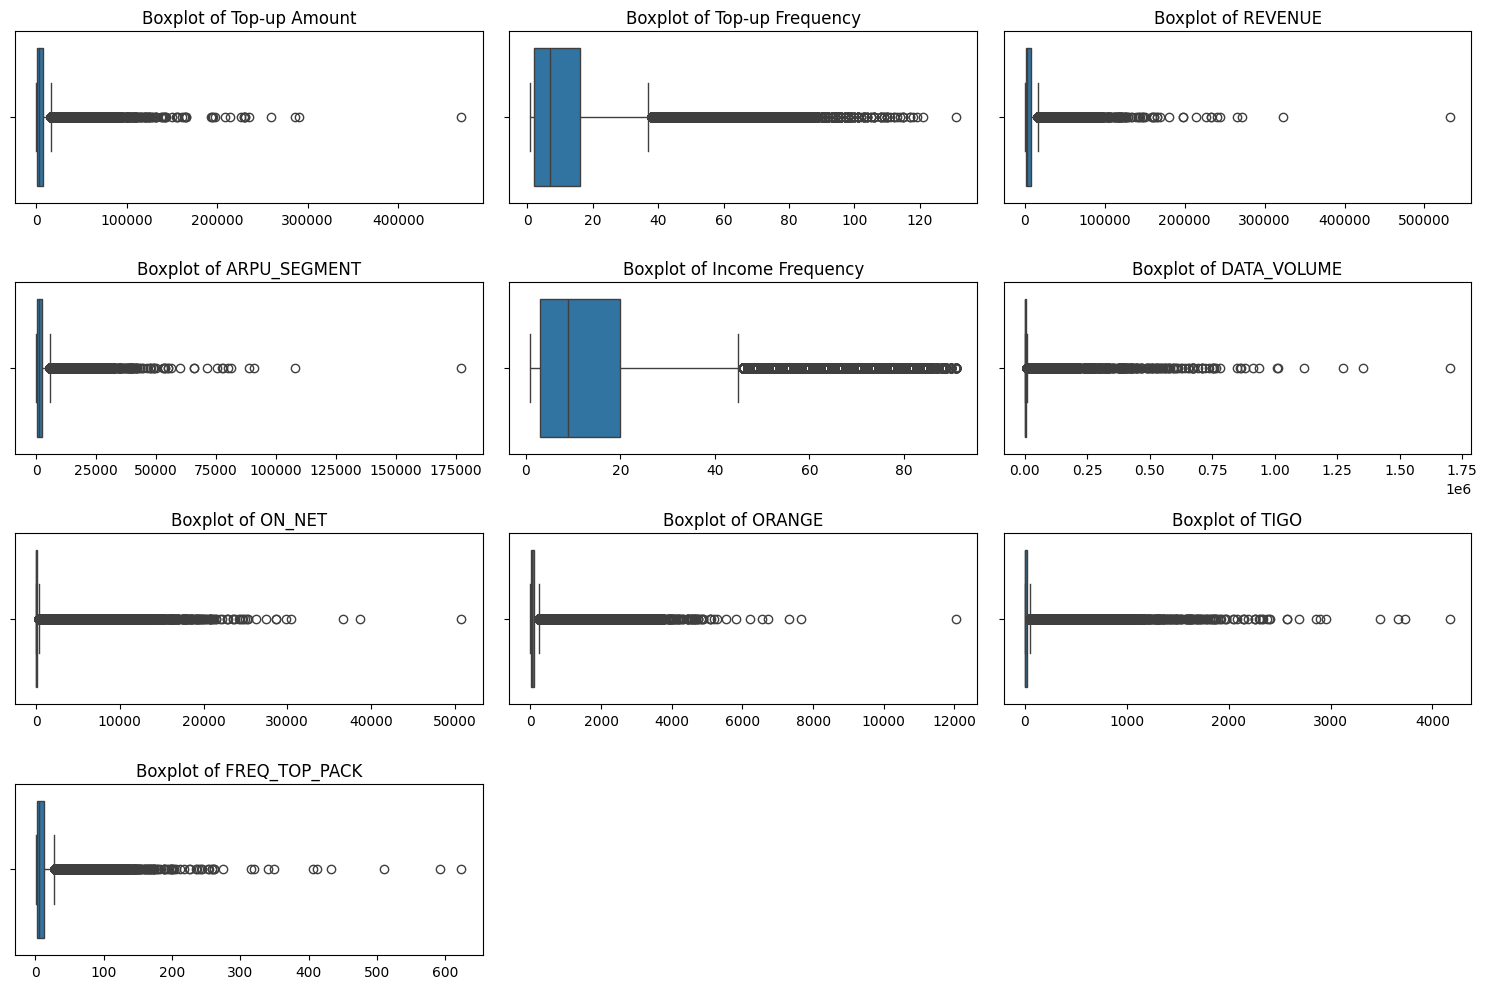

In [21]:

# List of columns with outliers
outlier_columns = ['Top-up Amount', 'Top-up Frequency', 'REVENUE', 'ARPU_SEGMENT', 
                   'Income Frequency', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 
                   'FREQ_TOP_PACK']

# Plotting boxplots for each column
plt.figure(figsize=(15, 10))
for i, column in enumerate(outlier_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=Train_df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel('')
plt.tight_layout()
plt.show()


- **Top-up Amount and Top-up Frequency**: Some users exhibit high-value top-up amounts and frequencies compared to others, indicating potential differences in spending habits and usage frequency.
- **REVENUE and ARPU_SEGMENT**: Similar to top-up amounts, revenues and average revenue per user (ARPU) show outliers with notably high values, suggesting differences in revenue generation among users.
- **Income Frequency**: Outliers in income frequency indicate variations in how frequently users receive income, which could impact their spending behavior.
- **Data Usage (DATA_VOLUME)**: Outliers in data volume usage suggest differences in internet usage patterns among users, with some exhibiting significantly higher data usage than others.
- **Call Usage (ON_NET, ORANGE, TIGO)**: Users demonstrate varying levels of usage for on-net, ORANGE, and TIGO services, with outliers indicating higher usage levels for some users compared to others.
- **Top-up Pack Frequency (FREQ_TOP_PACK)**: Some users exhibit high frequencies in using specific top-up packages, suggesting preferences or requirements for certain top-up options.


In [22]:
# Assuming 'REGION', 'TENURE', 'MRG', and 'TOP_PACK' are categorical columns
region_distribution = Train_df['REGION'].value_counts()
tenure_distribution = Train_df['TENURE'].value_counts()
mrg_distribution = Train_df['MRG'].value_counts()
top_pack_distribution = Train_df['TOP_PACK'].value_counts()

print("Region Distribution:")
print(region_distribution)

print("\nTenure Distribution:")
print(tenure_distribution)

print("\nMRG Distribution:")
print(mrg_distribution)

print("\nTop Pack Distribution:")
print(top_pack_distribution)


Region Distribution:
REGION
DAKAR          256259
THIES           90171
SAINT-LOUIS     59895
LOUGA           49679
KAOLACK         48498
DIOURBEL        33564
TAMBACOUNDA     27562
KAFFRINE        22067
KOLDA           19464
FATICK          17775
MATAM           14650
ZIGUINCHOR      11036
SEDHIOU          1553
KEDOUGOU          514
Name: count, dtype: int64

Tenure Distribution:
TENURE
K > 24 month     1021853
I 18-21 month      22494
H 15-18 month      12913
G 12-15 month       7520
J 21-24 month       6324
F 9-12 month        4604
E 6-9 month          929
D 3-6 month          387
Name: count, dtype: int64

MRG Distribution:
MRG
NO    1077024
Name: count, dtype: int64

Top Pack Distribution:
TOP_PACK
All-net 500F=2000F;5d             158779
On net 200F=Unlimited _call24H     76302
Data:490F=1GB,7d                   57679
Data: 100 F=40MB,24H               42515
Mixt 250F=Unlimited_call24H        33620
                                   ...  
150=unlimited pilot auto               1


C:\Users\Admin\AppData\Local\Temp\ipykernel_12144\2297632608.py:18: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


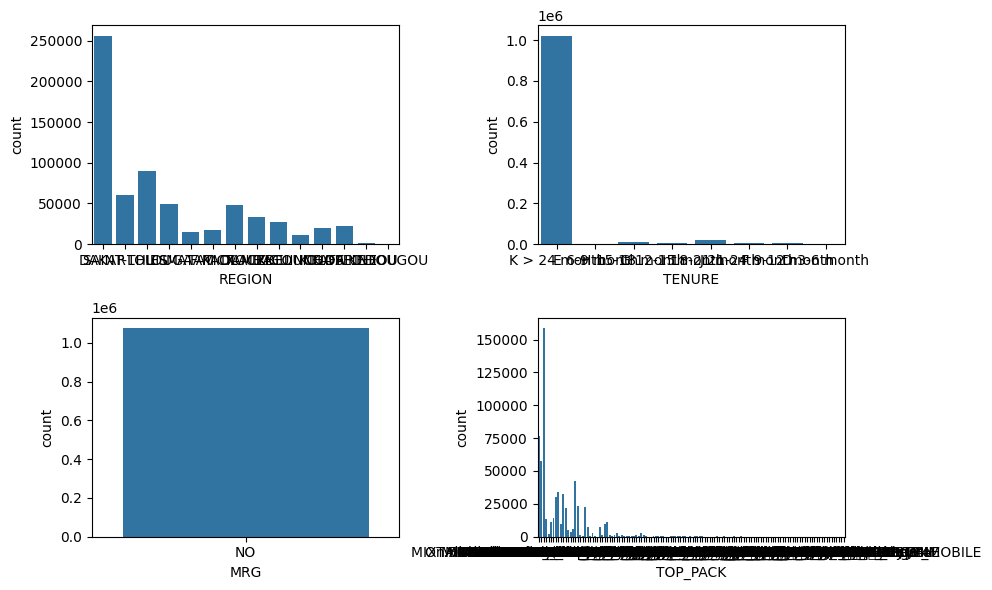

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.countplot(data=Train_df, x='REGION')

plt.subplot(2, 2, 2)
sns.countplot(data=Train_df, x='TENURE')

plt.subplot(2, 2, 3)
sns.countplot(data=Train_df, x='MRG')

plt.subplot(2, 2, 4)
sns.countplot(data=Train_df, x='TOP_PACK')

plt.tight_layout()
plt.show()



### Bivariate Analysis

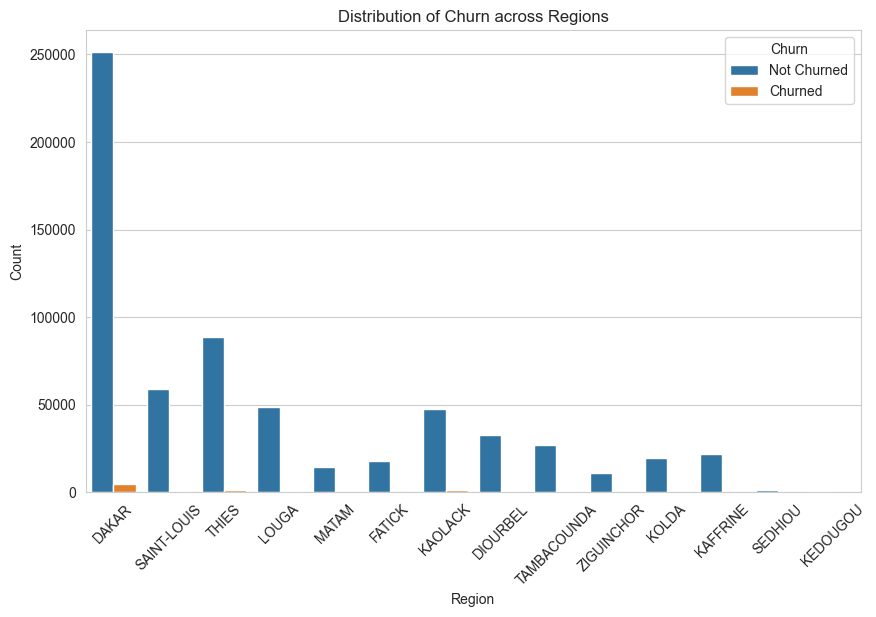

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='REGION', hue='CHURN', data=Train_df)
plt.title('Distribution of Churn across Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


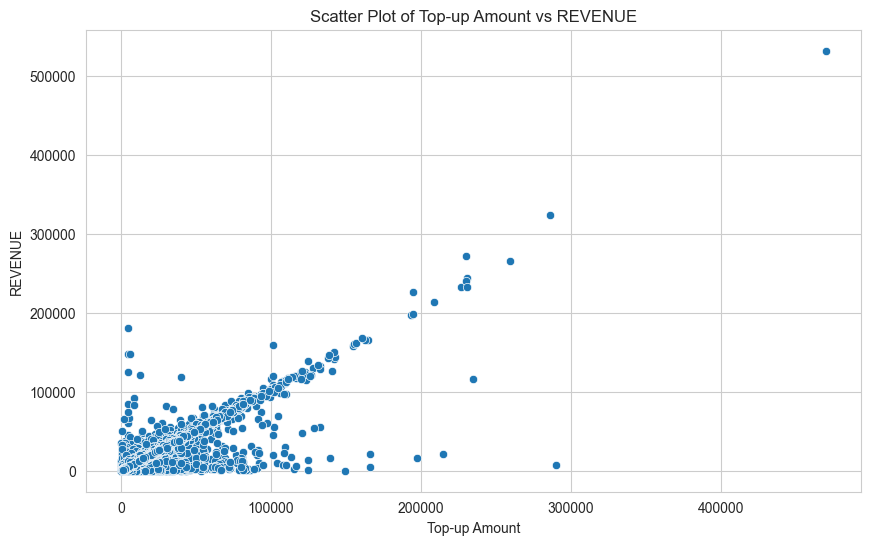

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Top-up Amount', y='REVENUE', data=Train_df)
plt.title('Scatter Plot of Top-up Amount vs REVENUE')
plt.xlabel('Top-up Amount')
plt.ylabel('REVENUE')
plt.show()



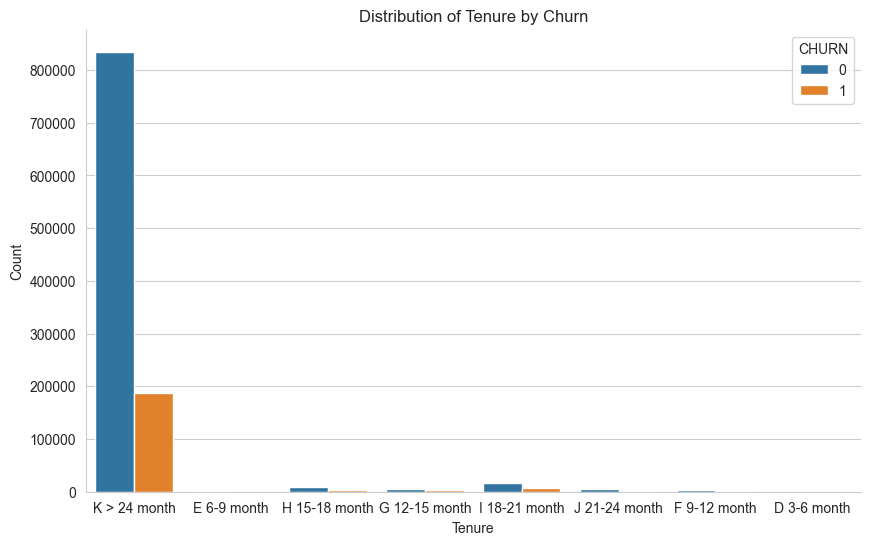

In [26]:
# Distribution of Tenure by Churn
# Setting the style
sns.set_style("whitegrid")

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=Train_df, x='TENURE', hue='CHURN')

# Removing gridlines
sns.despine()

# Adding title and labels
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Count')

# Displaying the plot
plt.show()


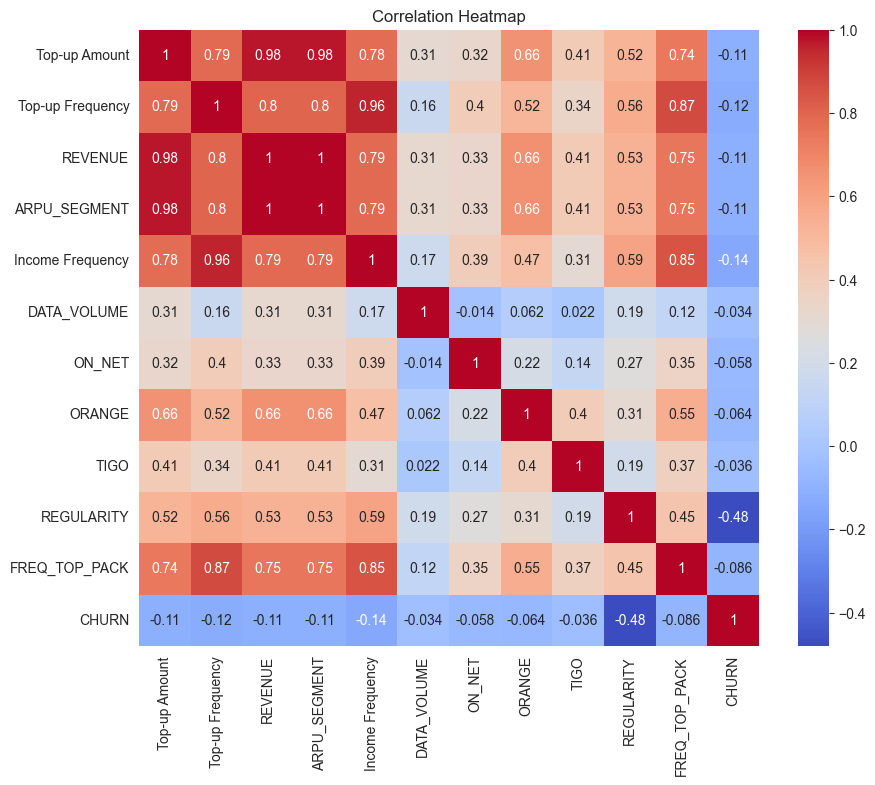

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_df = Train_df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation, annot=True, cmap='coolwarm')

# Adding title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()


### Multivariate Analysis

In [ ]:
Train_df

### Analytical Questions

#### 1.  Is there a difference in the average revenue (REVENUE) between churned and non-churned customers? 

In [28]:

# Filter the data for churned and non-churned customers
churned_customers = Train_df[Train_df['CHURN'] == 1]
non_churned_customers = Train_df[Train_df['CHURN'] == 0]

# Calculate the average revenue for churned and non-churned customers
average_revenue_churned = churned_customers['REVENUE'].mean()
average_revenue_non_churned = non_churned_customers['REVENUE'].mean()

print("Average Revenue for Churned Customers:", average_revenue_churned)
print("Average Revenue for Non-Churned Customers:", average_revenue_non_churned)


Average Revenue for Churned Customers: 2083.5827567581473
Average Revenue for Non-Churned Customers: 5702.9494428742655


From the results:

. The average revenue for churned customers is significantly lower (2083.58) compared to non-churned customers (5702.95).

. This suggests that customers who churn tend to generate less revenue for the company compared to those who do not churn.

#### 2. Do customers who refill their account frequently (Top-up Frequency) have a higher likelihood of churning? 

In [30]:

# Divide the customers into two groups based on churn
churned_customers = Train_df[Train_df['CHURN'] == 1]
non_churned_customers = Train_df[Train_df['CHURN'] == 0]

# Calculate the average frequency of account refills for each group
avg_freq_rech_churned = churned_customers['Top-up Frequency'].mean()
avg_freq_rech_non_churned = non_churned_customers['Top-up Frequency'].mean()

# Print the results
print("Average Frequency of Account Refills for Churned Customers:", avg_freq_rech_churned)
print("Average Frequency of Account Refills for Non-Churned Customers:", avg_freq_rech_non_churned)


Average Frequency of Account Refills for Churned Customers: 4.384446847257
Average Frequency of Account Refills for Non-Churned Customers: 11.901625765254256


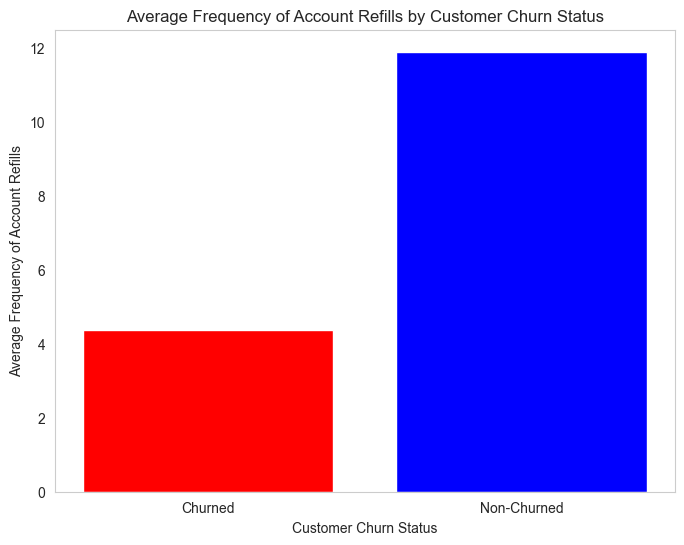

In [32]:

# Data
categories = ['Churned', 'Non-Churned']
average_freq_rech = [avg_freq_rech_churned, avg_freq_rech_non_churned]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(categories, average_freq_rech, color=['red', 'blue'])
plt.xlabel('Customer Churn Status')
plt.ylabel('Average Frequency of Account Refills')
plt.title('Average Frequency of Account Refills by Customer Churn Status')
plt.grid(False)
plt.show()



The results indicate that churned customers have a lower average frequency of account refills (4.38) compared to non-churned customers (11.90). This suggests that customers who refill their accounts more frequently are less likely to churn, while those who refill less often are more likely to churn.

#### 3. Do customers who have been with the network for longer durations (TENURE) exhibit lower churn rates?

In [42]:


# Separate churned and non-churned customers
churned_customers = Train_df[Train_df['CHURN'] == 1]
non_churned_customers = Train_df[Train_df['CHURN'] == 0]

# Calculate churn rates for each tenure category
churned_churn_rates = churned_customers.groupby('TENURE').size() / len(churned_customers)
non_churned_churn_rates = non_churned_customers.groupby('TENURE').size() / len(non_churned_customers)

# Combine churn rates into a DataFrame
churn_rates_df = pd.DataFrame({'Churned': churned_churn_rates, 'Non-Churned': non_churned_churn_rates})
churn_rates_df


,Churned,Non-Churned
TENURE,,
D 3-6 month,0.000267,0.000381
E 6-9 month,0.000802,0.000877
F 9-12 month,0.005669,0.003953
G 12-15 month,0.011857,0.005857
H 15-18 month,0.017446,0.010730
I 18-21 month,0.030625,0.018637
J 21-24 month,0.007000,0.005611
K > 24 month,0.926334,0.953955


From the results on churn rates across different tenure durations, several observations can be made:

1. **Churn Rate Increases with Shorter Tenure:** Customers with shorter tenure durations, such as "D 3-6 month" and "E 6-9 month", have relatively lower churn rates compared to those with longer tenures. However, as the tenure duration increases, the churn rate tends to rise gradually.

2. **Significant Increase in Churn Rate Beyond 12 Months:** There is a notable increase in churn rates for customers with tenure durations beyond 12 months. The churn rate more than doubles between "G 12-15 month" and "I 18-21 month" categories, indicating a critical period where customers may be more prone to churn.

3. **Retention Challenges Beyond 18 Months:** Customers with tenures between 18 and 21 months ("I 18-21 month") exhibit a churn rate of approximately 3%, which increases further for those with tenures between 21 and 24 months ("J 21-24 month"). This suggests that retaining customers beyond the 18-month mark may pose significant challenges.

4. **High Retention Rate for Long-Term Customers:** Customers with tenures exceeding 24 months ("K > 24 month") demonstrate remarkably high retention rates, with a churn rate of less than 10%. This indicates that once customers establish long-term relationships with the network, they are significantly less likely to churn.

In conclusion, the data suggests that tenure duration plays a crucial role in determining churn rates, with shorter tenures generally associated with lower churn rates. However, there is a critical period between 12 and 24 months where churn rates increase substantially, highlighting the importance of targeted retention strategies during this phase to mitigate customer attrition. Additionally, the exceptionally high retention rates observed for customers with tenures exceeding 24 months emphasize the significance of fostering long-term customer loyalty and satisfaction.


#### 4. Is there any relationship between call usage metrics (ON_NET, ORANGE, TIGO) and churn rates? remember churn is the target column

In [48]:
# Separate churned and non-churned customers
churned_customers = Train_df[Train_df['CHURN'] == 1]
non_churned_customers = Train_df[Train_df['CHURN'] == 0]

# Calculate the mean call usage metrics for churned customers
churned_mean_metrics = churned_customers[['ON_NET', 'ORANGE', 'TIGO']].mean()

# Calculate the mean call usage metrics for non-churned customers
non_churned_mean_metrics = non_churned_customers[['ON_NET', 'ORANGE', 'TIGO']].mean()

print("Mean Call Usage Metrics for Churned Customers:")
print(churned_mean_metrics)
print("\nMean Call Usage Metrics for Non-Churned Customers:")
print(non_churned_mean_metrics)


Mean Call Usage Metrics for Churned Customers:
ON_NET    60.411033
ORANGE    31.976731
TIGO      10.188409
dtype: float64

Mean Call Usage Metrics for Non-Churned Customers:
ON_NET    288.976892
ORANGE     97.843776
TIGO       23.516278
dtype: float64


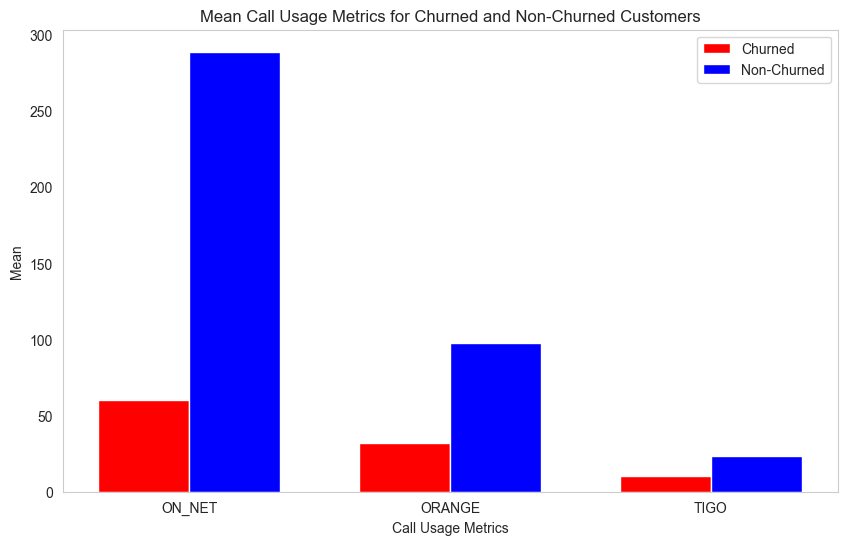

In [50]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Index for x-axis
ind = range(len(churned_mean_metrics))

# Plotting the mean call usage metrics for churned customers
plt.bar(ind, churned_mean_metrics, width=bar_width, label='Churned', color='red')

# Plotting the mean call usage metrics for non-churned customers
plt.bar([x + bar_width for x in ind], non_churned_mean_metrics, width=bar_width, label='Non-Churned', color='blue')

# Adding labels and title
plt.xlabel('Call Usage Metrics')
plt.ylabel('Mean')
plt.title('Mean Call Usage Metrics for Churned and Non-Churned Customers')
plt.xticks([x + bar_width/2 for x in ind], churned_mean_metrics.index)
plt.legend()
plt.grid(False)
# Showing plot
plt.show()


These metrics suggest that churned customers tend to have lower call usage across all three networks compared to non-churned customers. This insight could indicate a potential correlation between lower call usage and higher churn rates, highlighting the importance of call usage metrics in predicting customer churn.

### Data Insights so far:

- **Missing Values:** The dataset contains some entries where information is not available for certain variables. These missing values need to be addressed before performing analysis or modeling to avoid biases or inaccuracies in the results.

- **Irrelevant Columns:** Some columns in the dataset may not contribute significantly to the analysis or modeling task at hand. These irrelevant columns should be identified and dropped to streamline the dataset and improve the efficiency of the analysis.

- **Scaling Needed:** The numerical variables in the dataset are not on the same scale, meaning they have different ranges or units of measurement. Scaling techniques such as min-max scaling or standardization are required to bring all variables to a similar scale, which can enhance the performance of certain machine learning algorithms and ensure fair comparisons between variables.

- **Non-Normal Distribution:** The distribution of data across variables is not normal, meaning it does not follow a Gaussian distribution. This could impact the performance of statistical tests and machine learning algorithms that assume normality. Techniques such as transformation or non-parametric methods may be necessary to address this issue and improve the validity of the analysis.


## `Data Preparation`

In [51]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   user_id           1077024 non-null  object 
 1   REGION            652687 non-null   object 
 2   TENURE            1077024 non-null  object 
 3   Top-up Amount     699139 non-null   float64
 4   Top-up Frequency  699139 non-null   float64
 5   REVENUE           714669 non-null   float64
 6   ARPU_SEGMENT      714669 non-null   float64
 7   Income Frequency  714669 non-null   float64
 8   DATA_VOLUME       547261 non-null   float64
 9   ON_NET            683850 non-null   float64
 10  ORANGE            629880 non-null   float64
 11  TIGO              432250 non-null   float64
 12  MRG               1077024 non-null  object 
 13  REGULARITY        1077024 non-null  int64  
 14  TOP_PACK          626129 non-null   object 
 15  FREQ_TOP_PACK     626129 non-null   float64
 16  

In [53]:
Train_df.shape

(1077024, 14)

##### Dropping some not so useful columns

In [52]:
columns_to_drop = ['user_id', 'REGION', 'MRG']

Train_df = Train_df.drop(columns=columns_to_drop)


Reasons for Dropping Columns:

1. **user_id**: Since it is a unique identifier for each client, it doesn't provide any meaningful information for predicting churn.

2. **REGION**: The location of each client may not be directly correlated with churn behavior, especially if the network's performance is consistent across regions.

3. **MRG**: It seems to indicate whether a client is going or not. However, this information is already captured in the target variable 'CHURN', making this column redundant.


#### Split data into input(X) and target(y) features

In [55]:
# Separating the features (X) and target variable (y)
X = Train_df.drop('CHURN', axis=1)  
y = Train_df['CHURN']  

In [56]:
X.shape

(1077024, 13)

In [57]:
y.shape

(1077024,)

#### Split data into training and evaluation

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [71]:
X_train.columns

Index(['TENURE', 'Top-up Amount', 'Top-up Frequency', 'REVENUE',
       'ARPU_SEGMENT', 'Income Frequency', 'DATA_VOLUME', 'ON_NET', 'ORANGE',
       'TIGO', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK'],
      dtype='object')

In [72]:
X_test.shape

(215405, 13)

### Feature Engineering

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   TENURE            1077024 non-null  object 
 1   Top-up Amount     699139 non-null   float64
 2   Top-up Frequency  699139 non-null   float64
 3   REVENUE           714669 non-null   float64
 4   ARPU_SEGMENT      714669 non-null   float64
 5   Income Frequency  714669 non-null   float64
 6   DATA_VOLUME       547261 non-null   float64
 7   ON_NET            683850 non-null   float64
 8   ORANGE            629880 non-null   float64
 9   TIGO              432250 non-null   float64
 10  REGULARITY        1077024 non-null  int64  
 11  TOP_PACK          626129 non-null   object 
 12  FREQ_TOP_PACK     626129 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 106.8+ MB


In [74]:
numeric_column = X.select_dtypes(include='number').columns
numeric_column

Index(['Top-up Amount', 'Top-up Frequency', 'REVENUE', 'ARPU_SEGMENT',
       'Income Frequency', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'FREQ_TOP_PACK'],
      dtype='object')

In [75]:
categorical_column = X.select_dtypes(include='object').columns
categorical_column

Index(['TENURE', 'TOP_PACK'], dtype='object')

### Pipelines

##### Data Preprocessing Pipeline with Custom Log Transformation and Column Transformation

In [76]:
class LogTransformer():
    def __init__(self, constant=1e-5):
      
        self.constant = constant

    def fit(self, X, y=None):
       
        return self
    
    def transform(self, X):
   
        return np.log1p(X + self.constant)


# Pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', RobustScaler()),  # Scale features using RobustScaler
])

# Pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent category
    ('encoder', OneHotEncoder()),  # Encode categorical features using OneHotEncoder
])

# Preprocessor to apply transformations separately to numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('numerical_pipeline', numerical_pipeline, numeric_column),  # Apply numerical pipeline to numerical columns
    ('categorical_pipeline', categorical_pipeline, categorical_column)  # Apply categorical pipeline to categorical columns
])


### Label Encoding

In [77]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

### Balance Data set


In [78]:
#check if data is balanced
y_train.value_counts()

CHURN
0    700025
1    161594
Name: count, dtype: int64

 It appears that the data is imbalanced with respect to the target variable 'CHURN'.  So the data need to be balanced.

In [79]:
# Apply preprocessing to your data
X_preprocessed = preprocessor.fit_transform(X)

# Apply SMOTE to oversample the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)


KeyboardInterrupt: 